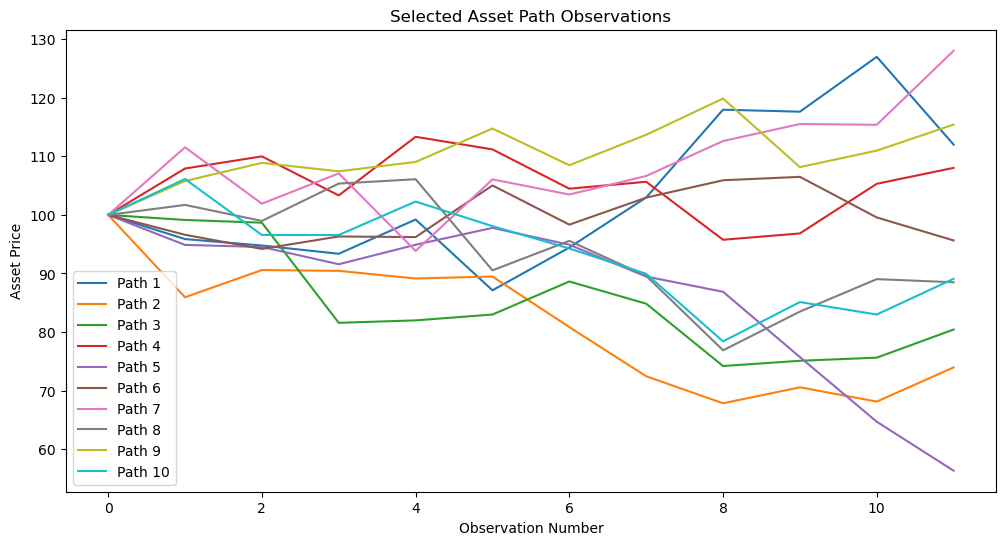

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_heston_paths(S0, V0, r, kappa, theta, sigma, rho, T, M=300, N=1000, m=12):
    """
    Simulate asset paths under the Heston model and return specific observations.

    Parameters:
    S0    : float  - Initial asset price
    V0    : float  - Initial variance
    r     : float  - Risk-free rate
    kappa : float  - Speed of reversion of the variance
    theta : float  - Long-term variance
    sigma : float  - Volatility of volatility
    rho   : float  - Correlation between asset and variance
    T     : float  - Time to maturity
    M     : int    - Total number of time steps to simulate
    N     : int    - Number of paths to simulate
    m     : int    - Number of observations to return

    Returns:
    S_obs : ndarray - Selected asset path observations
    V_obs : ndarray - Selected variance path observations
    """
    dt = T / M  # Time step
    S = np.zeros((N, M + 1))
    V = np.zeros((N, M + 1))
    S[:, 0] = S0
    V[:, 0] = V0

    # Cholesky decomposition for correlated Brownian motions
    L = np.array([[1, 0], [rho, np.sqrt(1 - rho**2)]])
    Z = np.random.normal(size=(2, M, N))

    # Generate correlated Brownian increments
    dW = np.sqrt(dt) * np.tensordot(L, Z, axes=([1],[0]))

    # Simulate the paths using Euler-Maruyama
    for t in range(M):
        dWs = dW[0, t, :]
        dWv = dW[1, t, :]
        V[:, t+1] = np.maximum(V[:, t] + kappa * (theta - V[:, t]) * dt + sigma * np.sqrt(np.maximum(V[:, t], 0)) * dWv, 0)
        S[:, t+1] = S[:, t] + r * S[:, t] * dt + np.sqrt(V[:, t+1]) * S[:, t] * dWs

    # Extract the specific observations
    observation_indices = np.linspace(0, M, m, dtype=int)
    S_obs = S[:, observation_indices]
    V_obs = V[:, observation_indices]

    return S_obs, V_obs

# Parameters
S0 = 100
V0 = 0.04
r = 0.05
kappa = 3
theta = 0.05
sigma = 0.3
rho = -0.6
T = 1
M = 300  # Total number of time steps
N = 1000  # Number of paths
m = 12  # Number of observations to return

# Simulate the paths
S_obs, V_obs = simulate_heston_paths(S0, V0, r, kappa, theta, sigma, rho, T, M, N, m)

# Plotting the first few paths
plt.figure(figsize=(12, 6))
for i in range(10):  # Plot the first 10 paths
    plt.plot(S_obs[i, :], label=f'Path {i+1}')
plt.title('Selected Asset Path Observations')
plt.xlabel('Observation Number')
plt.ylabel('Asset Price')
plt.legend()
plt.show()
